# Исследование данных интернет-магазина «Стримчик»

Проведем исследование данных интернет-магазина "Стримчик". 
    
    
## Описание данных

В датафрейме представлены данные по продажам компьютерных игр.


## План работы

<ul>
<li>Изучение данных на предмет неверного типа, опечаток, ошибок и пропусков.</li>
<li>Предобработка данных</li>
<li>Исследование продаж и жанров в трех регионах: Северная Америка, Европа, Япония</li> 
<li>Проверка двух гипотез:
<ul>
<li>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;</li>
<li>Средние пользовательские рейтинги жанров Action и Sports разные.</li>
</ul>


Откроем файл с данными и изучим общую информацию:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проверим данные на пропуски.

In [5]:
count = 0
shape_0 = data.shape[0]
for element in data.columns:
    if data[element].isna().sum() > 0: 
        print(element, ' - ', data[element].isna().sum(), 'пропусков, ', round(
            data[element].isna().sum() * 100 / shape_0,2), '% от числа строк.' )
        count = +1
if count == 0:
        print('Пропусков НЕТ')

Name  -  2 пропусков,  0.01 % от числа строк.
Year_of_Release  -  269 пропусков,  1.61 % от числа строк.
Genre  -  2 пропусков,  0.01 % от числа строк.
Critic_Score  -  8578 пропусков,  51.32 % от числа строк.
User_Score  -  6701 пропусков,  40.09 % от числа строк.
Rating  -  6766 пропусков,  40.48 % от числа строк.


### Промежуточные выводы

При первичном изучении данных можно заметить:

<ul>
<li>пропуски в столбцах 'name', 'year_of_release', 'genre', critic_score', 'user_score', 'rating'</li>
<li>в столбце 'year_of_release' некорректный тип данных float</li>
<li>в столбце 'user_score' некорректный тип данных object</li>
<li>неправильное написание столбцов c большой буквы и отдельных столбцов с большой буквы посередине</li>
</ul>

## Первичная обработка данных

Приведем названия столбцов к нижнему регистру.

In [6]:
data = data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'})

Обработаем пропуски.

Количество пропусков в столбцах 'name', 'year_of_release', 'genre' меньше 2%. Их можно удалить.

In [7]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

В столбцах 'critic_score', 'user_score', 'rating' - пропусков довольно много, удалить не можем - поскольку это повлечет за собой потерю большого количества данных, замену на 0 тоже не производим, чтобы не было пиков при дальнейшем исследовании и построении гистограмм.

In [8]:
#в столбце 'rating' все пропуски меняем на undefined.
data['rating'] = data['rating'].fillna('undefined')

Преобразуем типы данных в корректные - неправильный тип данных приведет к ошибке при подсчетах.

In [9]:
#data['year_of_release'] = data['year_of_release'].astype('int')
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year'] = data['year_of_release'].dt.year
data['year'].head(20)

0     2006
1     1985
2     2008
3     2009
4     1996
5     1989
6     2006
7     2006
8     2009
9     1984
10    2005
11    2005
12    1999
13    2007
14    2010
15    2009
16    2013
17    2004
18    1990
19    2005
Name: year, dtype: int64

In [10]:
#В столбце 'user_score' есть 'tbd', что мешает преобразовать тип данных
data.loc[data['user_score'] == 'tbd', 'user_score'] = 'NaN'
data['user_score'] = data['user_score'].astype('float')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       7463 non-null   float64       
 10  rating           16444 non-null  object        
 11  year             16444 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 1.6+ MB


Подсчитаем суммарные продажи во всех регионах и выделим их в отдельный столбец.

In [12]:
def total_sales(row):
    return row['na_sales'] + row['eu_sales'] + row['other_sales'] + row['jp_sales']

data['total_sales'] = data.apply(total_sales, axis=1)

### Промежуточные выводы

В рамках обработки данных была проведена следующая работа:

<ul>
<li>Приведены названия столбцов к нижнему регистру</li>
<li>Удалены пропуски в столбцах 'name', 'year_of_release', 'genre'</li>
<li>Скорректированы типы данных в столбцах 'year_of_release', 'user_score'</li>
<li>Посчитаны суммарные продажи во всех регионах и выделены в отдельный столбец</li>
</ul>

## Исследовательский анализ данных

Изучим, сколько игр выпускалось за разные годы:

Text(0.5, 1.0, 'Выпуск игр в разные годы')

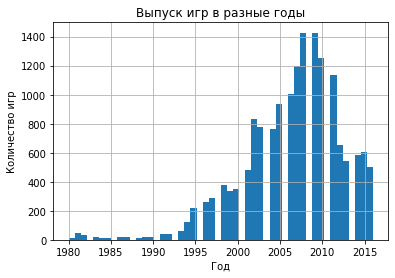

In [13]:
data['year'].hist(bins=50)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Выпуск игр в разные годы')

За период 1980 - 1990 гг. наблюдалось снижение выпуска игр, затем рост до примерно 2008 года и снижение до 2016 года. Вероятно можно не учитывать данные с 1980 по 1990, поскольку игр в этот период выпускалось очень мало.

Рассмотрим изменение продаж по платформам:

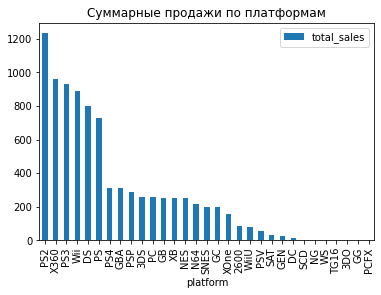

In [14]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind='bar')
plt.title('Суммарные продажи по платформам')
plt.show()

Из графика видно 6 платформ-лидеров по суммарным продажам, это: P52, X360, P53, Wii, DS, PS.

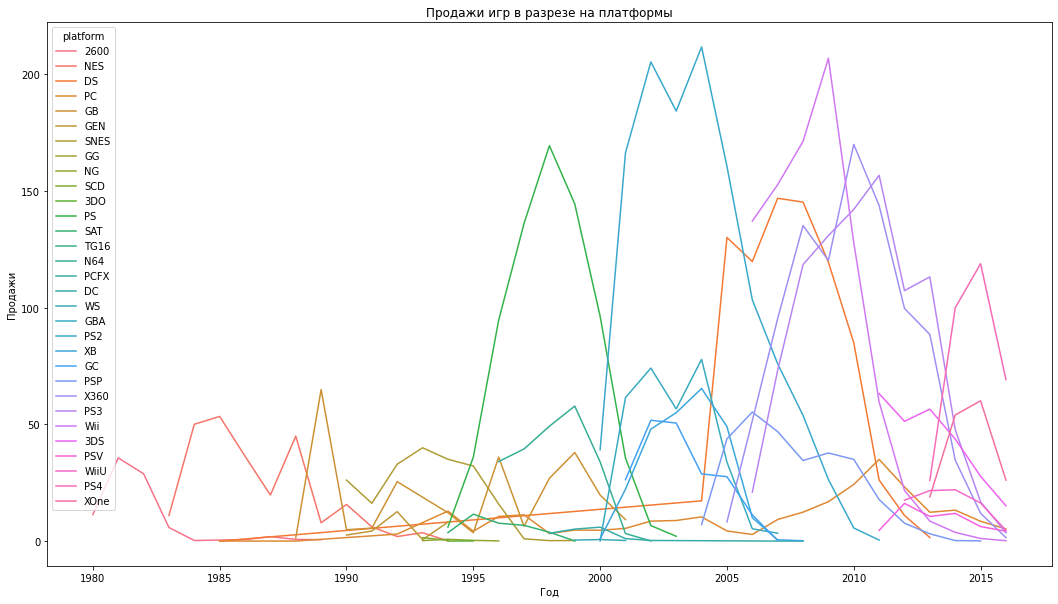

In [15]:
data_pivot0 = data \
.groupby(['year', 'platform']) \
.agg({'total_sales': 'sum'})

plt.figure(figsize=(18, 10))
ax = sns.lineplot(data=data_pivot0, x='year', y='total_sales', hue='platform', markers=True, dashes=True) \
        .set(title='Продажи игр в разрезе на платформы', xlabel='Год', ylabel='Продажи') 


 За какой характерный срок появляются новые и исчезают старые платформы?

In [16]:
display(data.loc[:,['year_of_release', 'platform']] \
        .drop_duplicates() \
        .pivot_table(index=['platform'], values='year_of_release', aggfunc='count') \
        .year_of_release.describe())

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

Платформы исчезают и появляются в среднем за 7 лет.

Возьмем данные за актуальный период, которые помогут нам построить прогноз на 2017 год. Выберем несколько потенциально прибыльных платформ. 

In [17]:
#для этого рассмотрим данные по продажам за последние 4 года, оставляем данные с 2013 года.
data_actual = data.query('year_of_release > 2012')
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,2013,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,2013,16.27
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,2015,14.63
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undefined,2013,14.60
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,2014,12.62


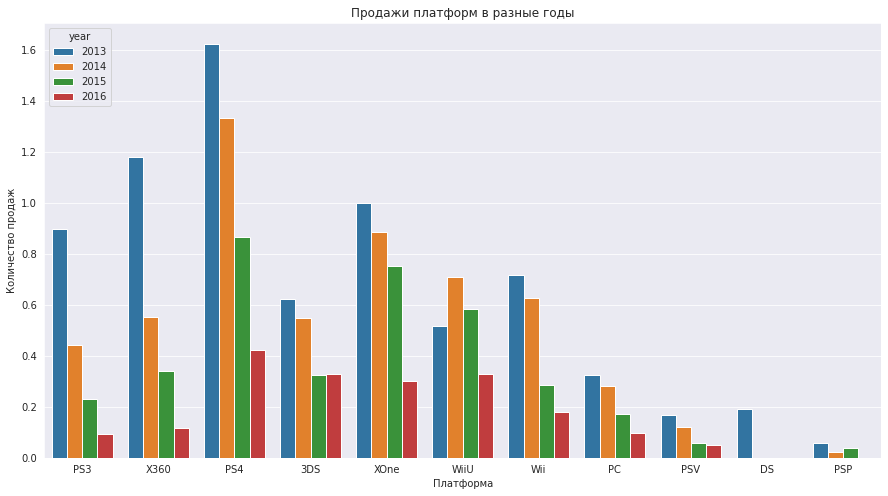

In [18]:
plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')
(sns.barplot(x='platform', y='total_sales', data=data_actual, hue='year', ci=None)
    .set(title='Продажи платформ в разные годы', xlabel='Платформа', ylabel='Количество продаж'))
plt.show()

По продажам в рассмотренный период лидирует платформа PS4, однако в 2016 году можно заметить некоторый спад продаж (который характерен для продаж в целом по всем платформам). В 2013 году хорошие продажи показывали платформы PS3 и X360, продажи по которой снижались и ощутимо упали в 2016 году. C 2013 по 2015 год можно заметить рост платформ PC и WiiU.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

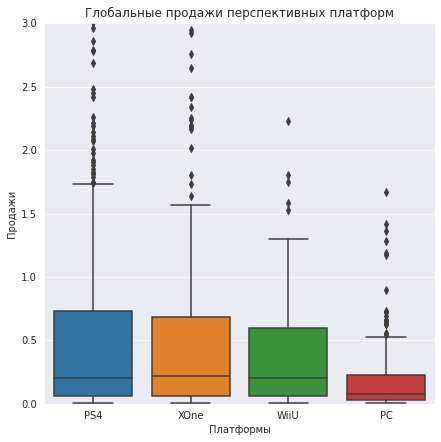

In [19]:
plt.figure(figsize=(7, 7))
prospective_platforms = ['PS4', 'XOne', 'PC', 'WiiU']
sns.boxplot(data = data_actual.query('platform in @prospective_platforms'), y = 'total_sales', x='platform')\
.set(
    title = 'Глобальные продажи перспективных платформ', xlabel = 'Платформы', ylabel = 'Продажи')
plt.ylim(0, 3);

Среди перспективных платформ по продажам лидером является PS4, недалеко от нее ушла XOne. Самые меньшие показатели у PC.

Посмотрим, как влияют на продажи платформы PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [20]:
data_ps = data_actual.query('platform == "PS4"')
data_ps[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


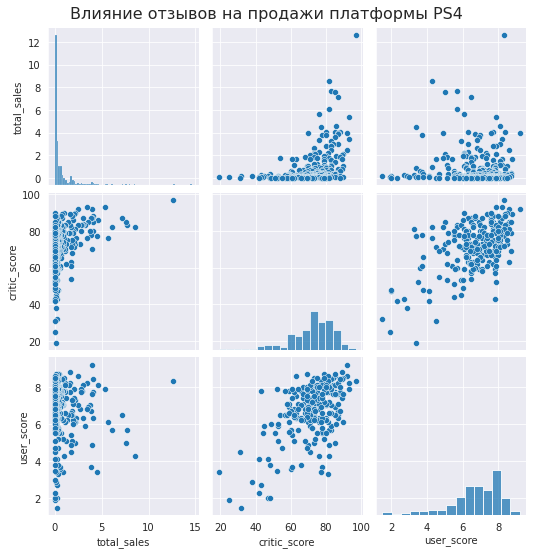

In [21]:
sns.pairplot(data_ps[['total_sales', 'critic_score', 'user_score']], diag_kind="hist")
plt.suptitle('Влияние отзывов на продажи платформы PS4', fontsize=16, y=1.02)
plt.show()

Нет прямой взаимосвязи между продажами и оценками пользователей, есть слабая зависимость продаж от оценок критиков.

Посмотрим корреляцию для других платформ.

In [22]:
data_xone = data_actual.query('platform == "XOne"')
data_pc = data_actual.query('platform == "PC"')
data_wiiu = data_actual.query('platform == "WiiU"')

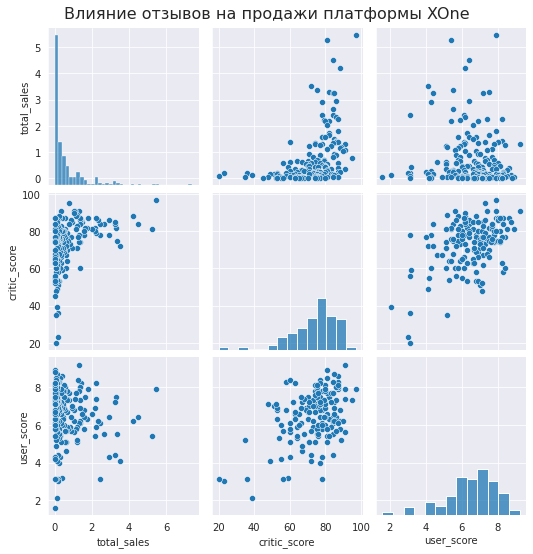

In [23]:
sns.pairplot(data_xone[['total_sales', 'critic_score', 'user_score']], diag_kind="hist")
plt.suptitle('Влияние отзывов на продажи платформы XOne', fontsize=16, y=1.02)
plt.show()

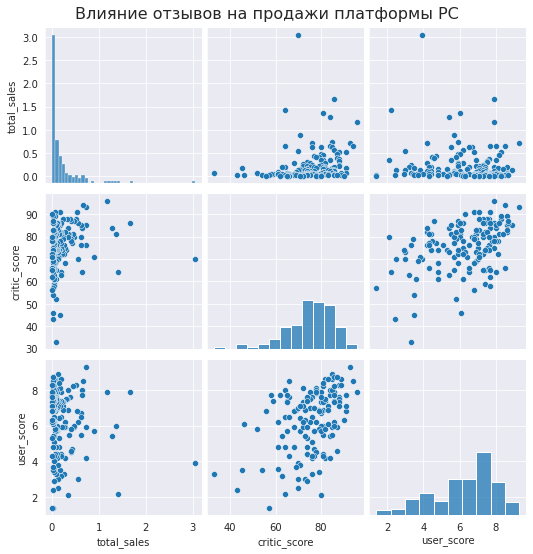

In [24]:
sns.pairplot(data_pc[['total_sales', 'critic_score', 'user_score']], diag_kind="hist")
plt.suptitle('Влияние отзывов на продажи платформы PC', fontsize=16, y=1.02)
plt.show()

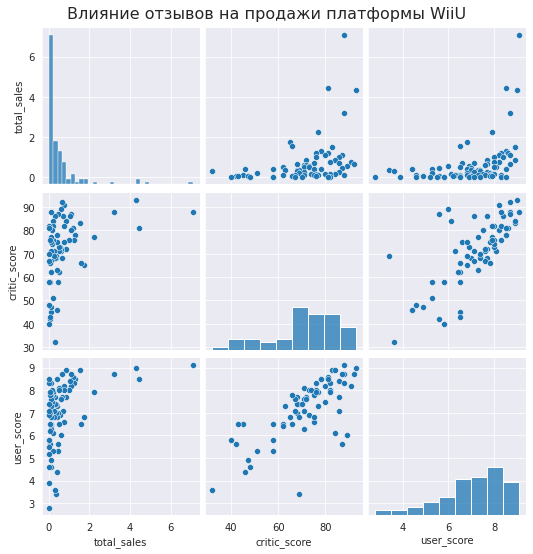

In [25]:
sns.pairplot(data_wiiu[['total_sales', 'critic_score', 'user_score']], diag_kind="hist")
plt.suptitle('Влияние отзывов на продажи платформы WiiU', fontsize=16, y=1.02)
plt.show()

Для других топ-платформ также не выявлено зависимости продаж от оценок пользователей.

Посмотрим на общее распределение игр по жанрам.

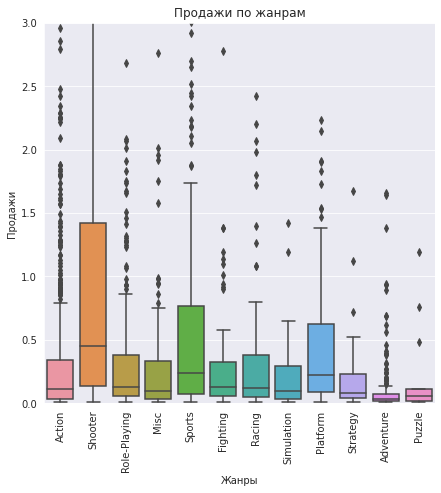

In [26]:
data_actual.pivot_table(index='genre', values='total_sales', aggfunc='median')
plt.figure(figsize=(7, 7))
prospective_platforms = ['PS4', 'XOne', 'PC', 'WiiU']
sns.boxplot(data = data_actual, y = 'total_sales', x='genre')\
.set(
    title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Продажи')
plt.ylim(0, 3)
plt.xticks(rotation=90);

Лучше всего продаются игры в жанре shooter, далее с отрывом почти в 2 раза sports и platform. Меньше всего пользуются спросом игры в жанре adventure.

### Промежуточные выводы

Выводы исследования:

<ul>
<li>За период 1980 - 1990 гг. наблюдалось снижение выпуска игр, затем рост до примерно 2008 года и снижение до 2016 года.</li>
<li>Выявлено 6 платформ-лидеров по суммарным продажам, это: P52, X360, P53, Wii, DS, PS.</li>
<li>Платформы исчезают и появляются в среднем за 7 лет.</li>
<li>За актуальный период с 2013 по 2016 гг.лидирует платформа PS4.Наиболее перспективными платформами за актуальный период являются 'PS4', 'XOne', 'PC', 'WiiU'.</li>
<li>Среди перспективных платформ по продажам лидером является PS4. Самые меньшие показатели у PC.</li>
<li>Нет прямой взаимосвязи между продажами и оценками пользователей, есть слабая зависимость продаж от оценок критиков.</li>
<li>Лучше всего продаются игры в жанре shooter, далее с отрывом почти в 2 раза sports и platform. Меньше всего пользуются спросом игры в жанре adventure.</li>
</ul>

## Составим портрет пользователя каждого региона

Определим топ-5 платформ для каждого региона (NA, EU, JP)

[Text(0, 0.5, '')]

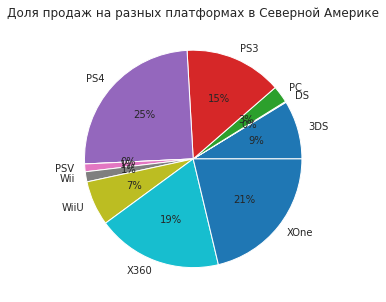

In [27]:
na_sales = data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum')
na_sales.columns = ['sales']
na_sales.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Доля продаж на разных платформах в Северной Америке", figsize=(5, 5)).set(ylabel='')

В Северной Америке по продажам лидируют  X360, PS3, PS4, 3DS, XOne. Лучше всего продаются игры на платформе X360, средний уровень продаж достигает почти 10 млн.

[Text(0, 0.5, '')]

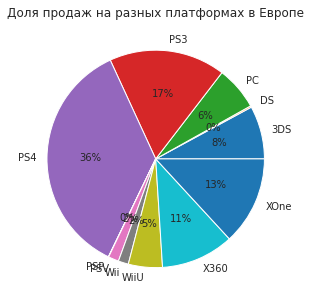

In [28]:
eu_sales = data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
eu_sales.columns = ['sales']
eu_sales.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Доля продаж на разных платформах в Европе", figsize=(5, 5)).set(ylabel='')

В Европе в топ-5 лидеров по продажам входят: PS3, X360, PS4, 3DS; XOne и WiiU почти равны (с небольшим превышением со стороны XOne) и делят 5-е место.

[Text(0, 0.5, '')]

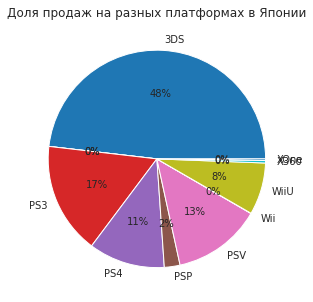

In [29]:
jp_sales = data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
jp_sales.columns = ['sales']
jp_sales.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Доля продаж на разных платформах в Японии", figsize=(5, 5)).set(ylabel='')

В Японии уверено лидирует 3DS с продажами чуть более 4 млн проданных копий, также в топ-5 лидеров входят WiiU, PS3, PSV и PS4.

Выявим топ-5 самых популярных жанров в регионах.

[Text(0, 0.5, '')]

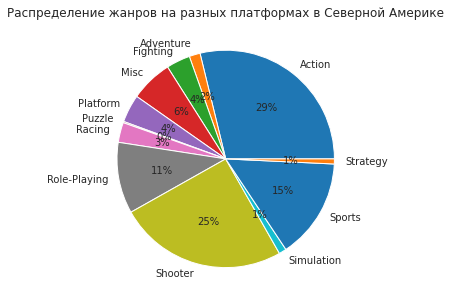

In [30]:
na_genres = data_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum')
na_genres.columns = ['sales']
na_genres.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Распределение жанров на разных платформах в Северной Америке", figsize=(5, 5)).set(ylabel='')

Как и во всем датафрейме, в Северной Америке лидирует жанр Action с показателем почти 10 млн проданных копий, также в пятерку лидеров вошли жанры: Shooter, Misc, Role-Playing, Fighting.  

[Text(0, 0.5, '')]

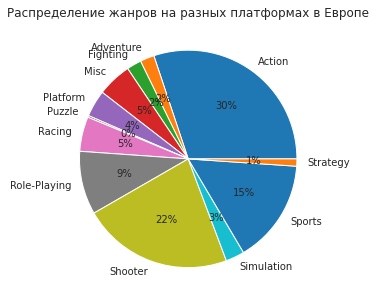

In [31]:
eu_genres = data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
eu_genres.columns = ['sales']
eu_genres.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Распределение жанров на разных платформах в Европе", figsize=(5, 5)).set(ylabel='')

Как и в Северной Америке, в Европе популярны жанры: Action, Shooter, Role-Playing, Misc. Однако европейские пользователи в большей степени интересуются спортивным жанром, что заметно по графику.

[Text(0, 0.5, '')]

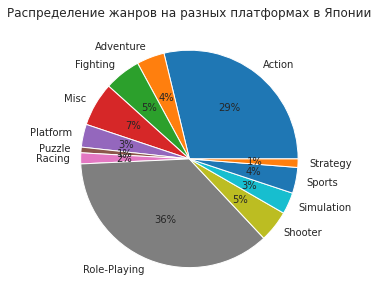

In [32]:
jp_genres = data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
jp_genres.columns = ['sales']
jp_genres.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Распределение жанров на разных платформах в Японии", figsize=(5, 5)).set(ylabel='')

Как и северо-американские и европейские, японские пользователи выделяют жанры Action, Shooter, Role-Playing. Любовь к жанру Fighting роднит японских и северо-американских пользователей. Однако среди лидеров продаж среди японских пользователей можно увидеть новый жанр - Simulation.

Изучим, влияет ли рейтинг ESRB на продажи в представленных регионах.

[Text(0, 0.5, '')]

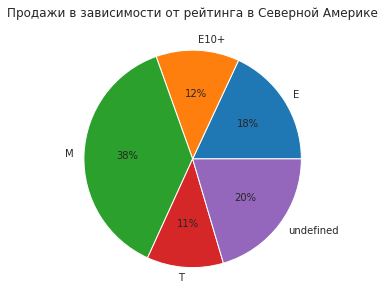

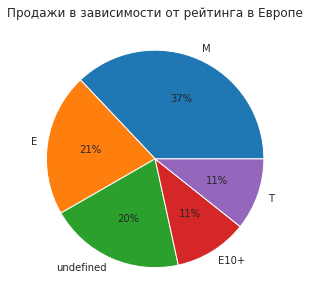

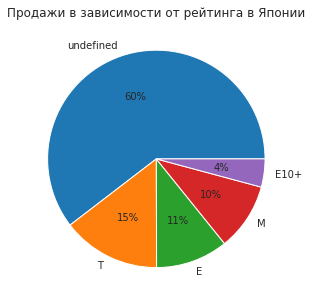

In [33]:
na_rating = data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum')
na_rating.columns = ['sales']
na_rating.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Продажи в зависимости от рейтинга в Северной Америке", figsize=(5, 5)).set(ylabel='')

eu_ratings = data_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_ratings.columns = ['sales']
eu_ratings.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Продажи в зависимости от рейтинга в Европе", figsize=(5, 5)).set(ylabel='')

jp_rating = data_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_rating.columns = ['sales']
jp_rating.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Продажи в зависимости от рейтинга в Японии", figsize=(5, 5)).set(ylabel='')

Поскольку игры в жанрах Action и Shooter лидируют в Северной Америке и Европе, продажи игр взрослых рейтингов в этих регионах преобладают. 

Также можно заметить большое количество продаж детских игр. 

### Промежуточные выводы

<ul>
<li>В Северной Америке и Европе по уровню продаж лидирует X360, в Японии 3DS.</li>
<li>В Северной Америке, Японии и в Европе популярны жанры: Action, Role-Playing, Misc. В Европе лидирует жанр Sports.</li>
<li>Продажи игр взрослых рейтингов лидируют в Северной Америке и Европе. Также наблюдается большое количество продаж детских игр.</li>
</ul>


## Проверка гипотез

Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1 - Средние пользовательские рейтинги платформы Xbox One и PC отличаются.

In [34]:
user_score_xone = data_actual.query('platform == "XOne"')['user_score'].dropna()
user_score_pc = data_actual.query('platform == "PC"')['user_score'].dropna()


results = st.ttest_ind(
    user_score_xone, user_score_pc,
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [35]:
data_actual.query('platform == "XOne"')['user_score'].mean()

6.521428571428572

In [36]:
data_actual.query('platform == "PC"')['user_score'].mean()

6.269677419354839

Тест подтвердил нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.

H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1 - Средние пользовательские рейтинги жанров Action и Sports отличаются.

In [37]:
user_score_action = data_actual.query('genre == "Action"')['user_score'].dropna()
user_score_sports = data_actual.query('genre == "Sports"')['user_score'].dropna()

results = st.ttest_ind(
    user_score_action, user_score_sports,
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


In [38]:
data_actual.query('genre == "Action"')['user_score'].mean()

6.837532133676093

In [39]:
data_actual.query('genre == "Sports"')['user_score'].mean()

5.238124999999999

Тест подтвердил нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые.

Был выбран тест ind, поскольку в обоих случаях у нас 2 генеральные совокупности, которые не зависят друг от друга. Equal_var=False, т.е. выборки разные.

## Общий вывод

В рамках исследования данных интернет-магазина Стримчик была проведена предобработка данных, исследование продаж и жанров в трех регионах: Северная Америка, Европа, Япония, а также проведена проверка 2 гипотез:
<ul>
<li>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;</li>
<li>Средние пользовательские рейтинги жанров Action и Sports разные.</li>
</ul>


В рамках обработки данных была проведена следующая работа:
<ul>
<li>Приведены названия столбцов к нижнему регистру</li>
<li>Удалены пропуски в столбцах 'name', 'year_of_release', 'genre'</li>
<li>Скорректированы типы данных в столбцах 'year_of_release', 'user_score'</li>
<li>Посчитаны суммарные продажи во всех регионах и выделены в отдельный столбец</li>
</ul>

Выводы:

<ul>
<li>За период 1980 - 1990 гг. наблюдалось снижение выпуска игр, затем рост до примерно 2008 года и снижение до 2016 года.</li>
<li>Выявлено 6 платформ-лидеров по суммарным продажам, это: P52, X360, P53, Wii, DS, PS.</li>
<li>Платформы исчезают и появляются в среднем за 7 лет.</li>
<li>За актуальный период с 2013 по 2016 гг.лидирует платформа PS4.Наиболее перспективными платформами за актуальный период являются 'PS4', 'XOne', 'PC', 'WiiU'.</li>
<li>Среди перспективных платформ по продажам лидером является PS4. Самые меньшие показатели у PC.</li>
<li>Лучше всего продаются игры в жанре shooter, далее с отрывом почти в 2 раза sports и platform. Меньше всего пользуются спросом игры в жанре adventure.</li>
<li>В Северной Америке и Европе по уровню продаж лидирует X360, в Японии 3DS.</li>
<li>В Северной Америке, Японии и в Европе популярны жанры: Action, Role-Playing, Misc. В Европе лидирует жанр Sports.</li>
<li>Продажи игр взрослых рейтингов лидируют в Северной Америке и Европе. Также наблюдается большое количество продаж детских игр.</li>
</ul>
Подтвердились гипотезы:
<ul>
<li>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. </li>
<li>Cредние пользовательские рейтинги жанров Action и Sports одинаковые.</li>
</ul>
